# SyriaTel Customer Churn Prediction. 

## Overview 

SyriaTel is a mobile network provider in Syria. This project aims to provide insights into the determinant factors of churning as well as predict future cases of churn using different models in order to provide adequate recommendations to the company. This would in turn help to retain customers / product consumers who would otherwise churn. This would help improve the health of the business while assisting in the forecasting of future revenue for the business. Building a classifier to predict whether a customer will ("soon") stop doing business with SyriaTel, would then provide information on patterns that may exist and shed light on the problem.


## Business and Data Understanding 

#### Business Understanding 

The project uses [SyriaTel Customer Churn](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) dataset from kaggle. The dataset is going to be used to determine features that are likely very related to the possibility of users to stop or cancel using the services of SyriaTel comunications. In examining these features, it is possible to identify these features and use them to predict future churn possibilities.

In [1]:
# Import the necessary modules
# Modules dealing with data and visualizations
import pandas as pd
import numpy as np
import seaborn  as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import statsmodels as statsmd

# Modules for modelling
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

>> * **Loading and viewing the dataset**

In [2]:
# Loading the datset
df = pd.read_csv('Data/churndata.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Data Understanding

The dataset contains 3,333 rows and 21 columns. The columns contain features associated with call information such as number of minutes for calls, time of day the calls were made, the type of call, that is, international of to customer service etcetra. The target feature is the churn in the churn column which shows which consumers stopped using the services as well as which consumers continued using the service. The dataset is also imbalanced as will be seen later and this will need to be addressed as well

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
# Descriptive Statistics
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
# Checking the new shape of the data
def data_shape(data):
    return (f"The data has a shape of {data.shape} with {data.shape[0]} rows and {data.shape[1]} columns")

data_shape(df)

'The data has a shape of (3333, 21) with 3333 rows and 21 columns'

> * From the above cells we can see that the dataset, there are no null values. This can be seen by the constant count in the description as well as non-null counts in the information about the dataset but this is confirmed in the next section. 
> * It also identifies 1 boolean column, 8 float and 8 integer columns and finally 4 object type columns. This means that there will be need to convert 5 columns for use including the target feature column. 

#### Data Preparation

> * In this section, the data is prepared before it is taken for modelling. This is where duplicated and missing values are checked for. From the information section, it is easy so see that there are no null values. Data type conversions will also be done here to prepare for modelling. This can be done through binary encoding, one hot encoding or dropping them if they are not useful.
> * This section also checks for multicollinearity as well as distribution of the dataset. For example normality of the distributions. There will be a need for resampling methods given the imbalance of the dataset.

##### EDA

* _This section explores the data and analyses the relationship between features in the dataset_

In [6]:
# Creating a function to view columns
def col_info(data):
    
    "This is a simple function to help describe the column data types"
    
    print('col_names: \n', data.columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('num_cols: \n', data.select_dtypes(int).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('cat_cols: \n', data.select_dtypes(object).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('boolean_cols: ', data.select_dtypes(bool).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('float_cols: \n', data.select_dtypes(float).columns)
    print('=====================================================================================')
    print('=====================================================================================')
    print('The shape: ', data.shape)
    print('=====================================================================================')
    print('=====================================================================================')
    print(f"There are {len(data.select_dtypes(int).columns)} numeric type columns, {len(data.select_dtypes(object).columns)} object type columns\
    {len(data.select_dtypes(bool).columns)} boolean columns and {len(data.select_dtypes(float).columns)} float type columns out of {df.shape[1]}")
    

In [7]:
# Checking the columns according to datatypes
col_info(df) 

col_names: 
 Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')
num_cols: 
 Index(['account length', 'area code', 'number vmail messages',
       'total day calls', 'total eve calls', 'total night calls',
       'total intl calls', 'customer service calls'],
      dtype='object')
cat_cols: 
 Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')
boolean_cols:  Index(['churn'], dtype='object')
float_cols: 
 Index(['total day minutes', 'total day charge', 'total eve minutes',
       'total eve charge', 'total night minutes', 'total ni

In [8]:
# Chreating a function for checking missing and duplicated values
def cleaning(data):
    "This is a simple function to get missing and duplicated values"
    
    n_missing = data.isna().sum().sum()
    n_duplicated = data.duplicated().sum()
    return (f"There are '{n_missing}' missing values and '{n_duplicated}' duplicated values in the dataset")

In [9]:
# veiwing the number of missing and duplicated values
cleaning(df)

"There are '0' missing values and '0' duplicated values in the dataset"

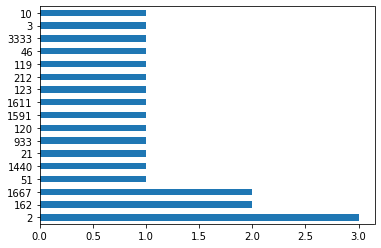

In [10]:
# Visualizing unique entries
df.nunique().value_counts().plot.barh();


> * The above cell shows the number of unique entries and is able to show the columns with a possibility of being categorical as well as those with very many unique entries.
>
> * I will first do univariate analysis to check the the individual distributions for the features in the dataset and check for any underlying pattern.

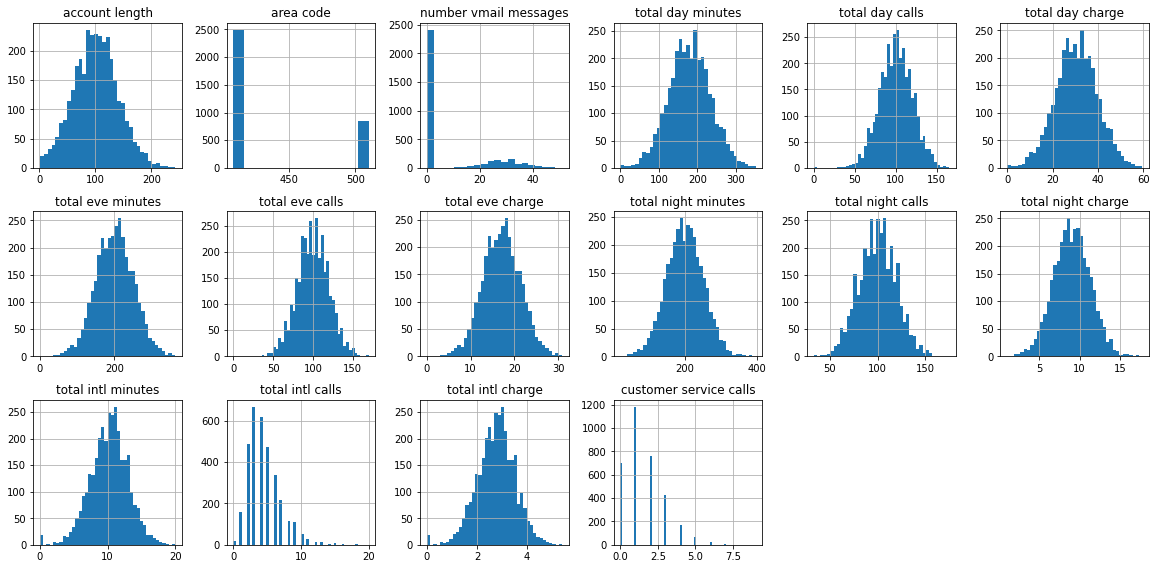

In [11]:
# Check the distribution of the data
df.hist(bins = 'auto', layout = (6,6), figsize = (20,20))
plt.show()

> * From the cell above it is visible that there are categorical features well as numerical features that seem to be normally distributed. Features such as account length and those calculating totals such as total day calls and total international calls or total night charges. 
>
> * There are also categorical features such as area code or voice mail messages. These features can be binary encoded or one hot encoded in order to work with them as numerical features. 

In [12]:
# Get a distribution of the target variable
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64


      The distribution for churn is:
churn
False    2850
True      483
Name: count, dtype: int64
      


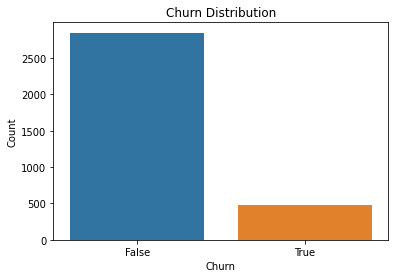

In [13]:
# Viewing the distribution of churn
print(f"""
      The distribution for churn is:\n{df['churn'].value_counts()}
      """)

sns.countplot(data=df, x='churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

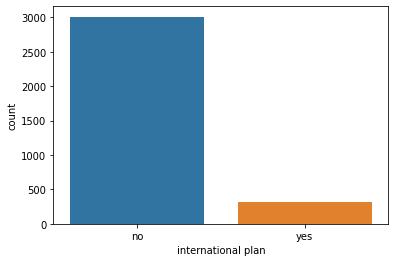

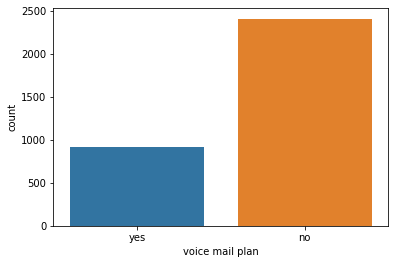

In [14]:
# Checking the distribution of data according to international plan
sns.countplot(data=df, x='international plan')
plt.show()

# Checking the distribution of data according to voice mail plan
sns.countplot(data=df, x='voice mail plan')
plt.show()

> * From the distributions above, we can see that the False values far exceed the True values for the Churn feature. This is also visible in the international plan with no values being more than the yes values. It is a bit different for the voice mail plan with no values being more that the yes values.
>
> * Having churn as the target column, and viewing it's individual distribution, as well as the distribution for international plan and voice mail plan; we can see a sense of imbalance in the dataset. The above shows that the dataset is imbalanced because one set of values exceed the other by a lot and would need to be resampled to prevent errors in the model.
>
> * The use of Synthetic Minority Oversampling Technique(SMOTE) would be able to mitigate this caveat as this is best done before modeling in order to get accurate predictions and evaluation.